# POC Decision_tree_classifier
-- identifies the classes of interest for the tree


In [0]:
import pandas as pd
import random 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/data/'

# Processes context data

In [0]:
names =  {'NONE':0, 
          'RAIN':1, 
          'DARKNESS':2, 
          'RAINDARKNESS':3, 
          'MOTIONBLUR':4, 
          "RAINMOTIONBLUR":5, 
          'DARKNESSMOTIONBLUR':6}
reverse_map =  {0:"NONE", 
                1:'RAIN', 
                2:'DARKNESS', 
                3:'RAINDARKNESS', 
                4:'MOTIONBLUR',  
                5:"RAINMOTIONBLUR",
                6:"DARKNESSMOTIONBLUR"
               }

df = pd.read_csv(root_path + "sensor_data.csv")
target_names = df['class'].unique()
data = df.iloc[: , 0:3].values
feature_names = list(df.iloc[: , 0:3].columns)
print("FEATURES: {}".format(feature_names))
classes = df['class'].map(names).values
random_data = {"data":data, 
                   "feature_names":feature_names,
                    "target_names":target_names,
                    "target":classes}

FEATURES: ['rain_sensor', 'datetime', 'velocity']


Populating the interactive namespace from numpy and matplotlib


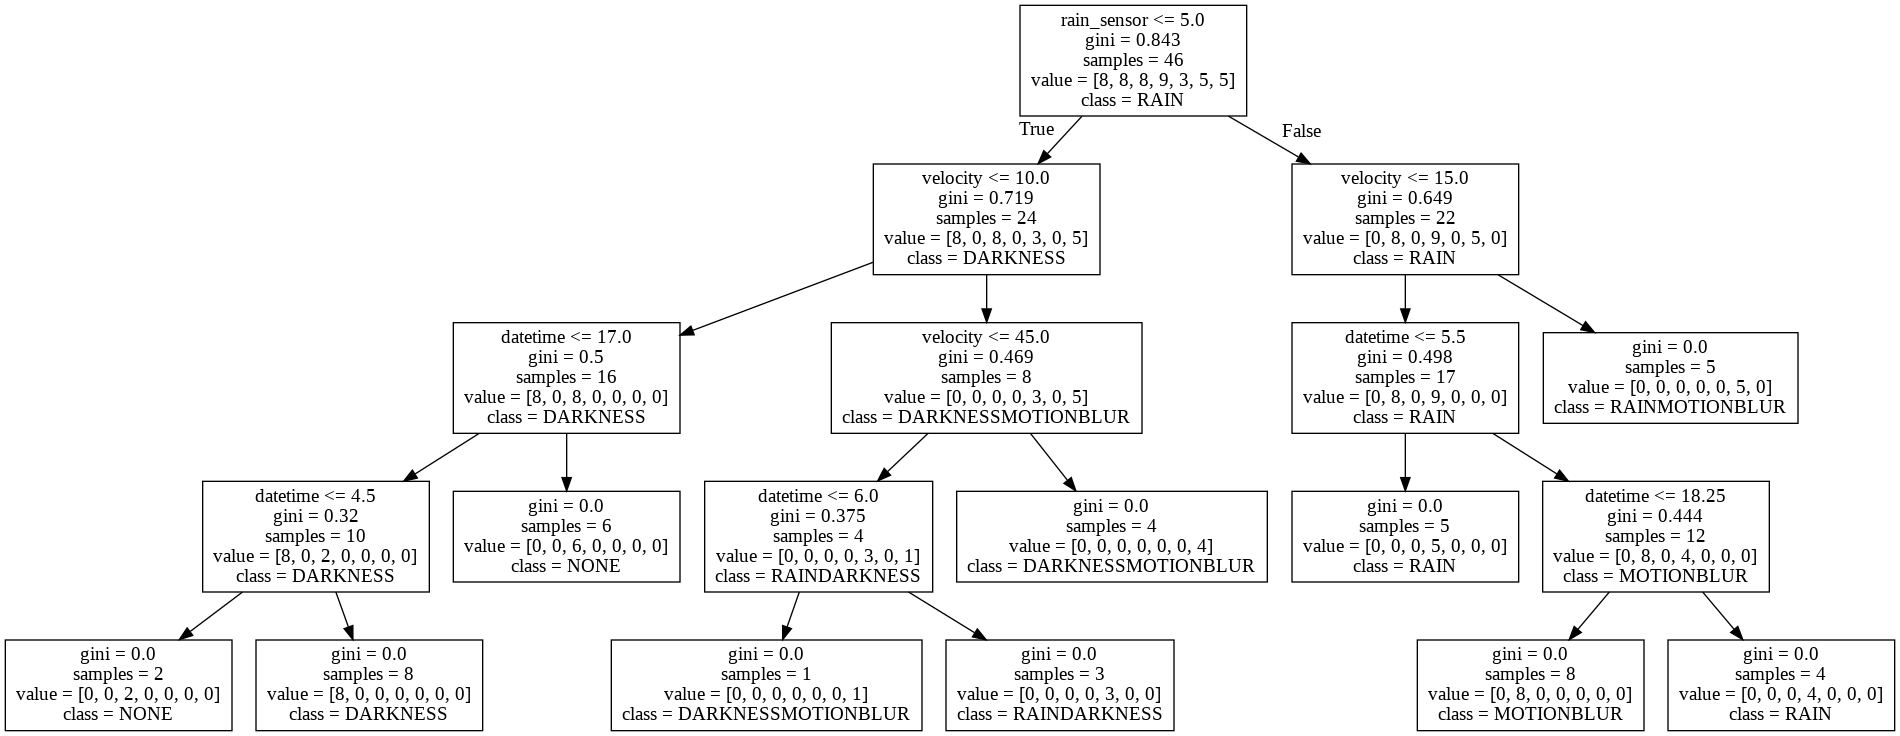

[[ 0 10  0]
 [ 0 14  0]
 [20 14  0]
 [ 0 20  0]
 [10  4  0]
 [ 0 16 40]]


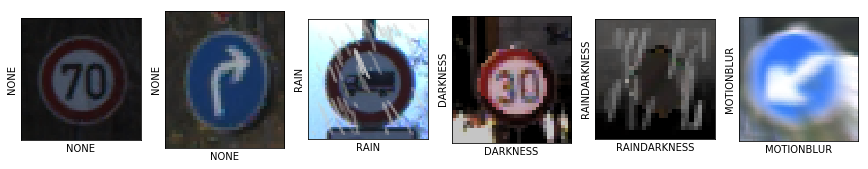

In [0]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import numpy
from IPython.display import Image, display
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class DT:
    def __init__(self, dataset, class_names):
        self.dataset = dataset
        self.class_names = class_names
        self.clf = self.train_model()


    def load_data_set():
        """
        Loads the iris data set

        :return:        data set instance
        """
        iris = load_iris()
        return iris

    def train_model(self):
        """
        Train decision tree classifier

        :param iris:    iris data set instance
        :return:        classifier instance
        """
        clf = tree.DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)
        clf = clf.fit(self.dataset['data'], self.dataset['target'])
        return clf

    def display_image(self):
        """
        Displays the decision tree image

        :param clf:     classifier instance
        :param iris:    iris data set instance
        """
        dot_data = tree.export_graphviz(self.clf, out_file=None,
                                        feature_names=self.dataset['feature_names'],
                                        class_names=self.dataset["target_names"],
                                        filled=False, rounded=False)

        graph = pydotplus.graph_from_dot_data(dot_data)
        display(Image(data=graph.create_png()))


    def create_predictions(self, test_value):


        #print("TEST{}".format(test_value))
        index_pred = int(self.clf.predict([test_value]))
        prediction_probability = self.clf.predict_proba([test_value])
        print(int(index_pred))


    def test_predictions(self, test_file):
        test = pd.read_csv(test_file)
        #print(test.img_path)
        correct_class = test['class'].map(self.class_names).values
        test['mapped_class'] = correct_class
        test_data = test.iloc[: , 0:3].values
        correct_class = list(correct_class)
        classifications = self.clf.predict(test_data)
        
        classification_prob = numpy.amax(self.clf.predict_proba(test_data))
        test['DT_classifications'] = classifications
        test['DT_classification_probability'] = classification_prob
        test['classification_labels'] = test['DT_classifications'].map(reverse_map)
        
        print(test_data)
        test.to_csv(test_file, index=False)
        
        plt.figure(figsize=(15, 16))
        for i in range(6):
            plt.subplot(1, 6, i+1)
            img=mpimg.imread(root_path + test.img_path[i])
            plt.xlabel(test.classification_labels[i])
            plt.ylabel(test['class'][i])
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img)
        

if __name__ == '__main__':
    context_data = random_data
    dt = DT(context_data, names)
    dt.display_image()
    dt.test_predictions(root_path + "test_1.csv")
